In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import pandas as pd

# Define the path to the uploaded file
file_path = '/content/drive/MyDrive/WVUResearch/rural_data.csv'
df = pd.read_csv(file_path)
df

,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips
0,2018,0R01-00288,Moscow,ID,All,Rural Reporter,"$7,413",4.0,15308.0,4023.0
1,2018,0R01-00291,Spokane,WA,All,Rural Reporter,NaN,NaN,219000.0,9605.0
2,2018,0R01-00304,Rexburg,ID,All,Rural Reporter,NaN,NaN,1773656.0,77135.0
3,2018,0R01-00306,Marsing,ID,All,Rural Reporter,"$1,523",2.0,779.0,174.0
4,2018,0R01-00311,Ketchum,ID,All,Rural Reporter,"$2,722,290",35.0,851065.0,536583.0
...,...,...,...,...,...,...,...,...,...,...
6303,2022,9R04-91113,Yerington,NV,All,Rural Reporter,"$192,122",12.0,56906.0,5177.0
6304,2022,9R04-99430,Pahrump,NV,All,Rural Reporter,"$566,863",13.0,258508.0,30292.0
6305,2022,9R05-90999,Upper Tumon,GU,All,Rural Reporter,"$2,026,980",29.0,445097.0,24554.0
6306,2022,9R06-99434,Pago Pago,AS,All,Rural Reporter,"$1,005,200",10.0,196729.0,32229.0


In [32]:
#Let's remove all naN values
df=df.dropna()
df

,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips
0,2018,0R01-00288,Moscow,ID,All,Rural Reporter,"$7,413",4.0,15308.0,4023.0
3,2018,0R01-00306,Marsing,ID,All,Rural Reporter,"$1,523",2.0,779.0,174.0
4,2018,0R01-00311,Ketchum,ID,All,Rural Reporter,"$2,722,290",35.0,851065.0,536583.0
5,2018,0R01-00341,Ponderay,ID,All,Rural Reporter,"$516,231",8.0,167051.0,69822.0
6,2018,0R01-00342,St. Maries,ID,All,Rural Reporter,"$242,093",13.0,92075.0,25449.0
...,...,...,...,...,...,...,...,...,...,...
6303,2022,9R04-91113,Yerington,NV,All,Rural Reporter,"$192,122",12.0,56906.0,5177.0
6304,2022,9R04-99430,Pahrump,NV,All,Rural Reporter,"$566,863",13.0,258508.0,30292.0
6305,2022,9R05-90999,Upper Tumon,GU,All,Rural Reporter,"$2,026,980",29.0,445097.0,24554.0
6306,2022,9R06-99434,Pago Pago,AS,All,Rural Reporter,"$1,005,200",10.0,196729.0,32229.0


In [33]:
# Group by SubRecipientCode and count the number of unique years for each agency
agency_years_count = df.groupby('SubRecipientCode')['Year'].nunique()

# Filter agencies that have data for all years from 2018 to 2022 (i.e., 5 years)
agencies_with_full_data = agency_years_count[agency_years_count == 5].index

# Filter the main DataFrame to include only these agencies
df = df[df['SubRecipientCode'].isin(agencies_with_full_data)]
# Function to clean dollar values and convert them to float
def clean_currency(value):
    # Remove dollar sign and commas, then convert to float
    return float(value.replace('$', '').replace(',', ''))

# Apply the function to the 'Total Operating Expense' column
df['Total Operating Expense'] = df['Total Operating Expense'].apply(clean_currency)
# Display the filtered DataFrame
df

<ipython-input-33-d25bfc74f674>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Operating Expense'] = df['Total Operating Expense'].apply(clean_currency)


,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips
4,2018,0R01-00311,Ketchum,ID,All,Rural Reporter,2722290.0,35.0,851065.0,536583.0
5,2018,0R01-00341,Ponderay,ID,All,Rural Reporter,516231.0,8.0,167051.0,69822.0
7,2018,0R01-00347,Lewiston,ID,All,Rural Reporter,590539.0,10.0,84099.0,161322.0
8,2018,0R01-00357,Twin Falls,ID,All,Rural Reporter,545266.0,12.0,87298.0,19938.0
10,2018,0R01-00403,Salmon,ID,All,Rural Reporter,156627.0,4.0,32097.0,16747.0
...,...,...,...,...,...,...,...,...,...,...
6302,2022,9R04-91107,Laughlin,NV,All,Rural Reporter,1115748.0,15.0,241989.0,77434.0
6303,2022,9R04-91113,Yerington,NV,All,Rural Reporter,192122.0,12.0,56906.0,5177.0
6304,2022,9R04-99430,Pahrump,NV,All,Rural Reporter,566863.0,13.0,258508.0,30292.0
6305,2022,9R05-90999,Upper Tumon,GU,All,Rural Reporter,2026980.0,29.0,445097.0,24554.0


In [34]:
len(df['SubRecipientCode'].unique()), len(df['State'].unique())

(1059, 51)

In [35]:
# Counting unique states and agencies for each year
unique_counts = df.groupby('Year').agg(
    Unique_States=('State', 'nunique'),
    Unique_Agencies=('SubRecipientCode', 'nunique')
)

# Display the result
unique_counts

,Unique_States,Unique_Agencies
Year,,
2018,51,1059
2019,51,1059
2020,51,1059
2021,51,1059
2022,51,1059


In [36]:
# Grouping by 'State' and 'Year' to count the number of agencies
agencies_per_state_year = df.groupby(['State', 'Year'])['SubRecipientCode'].nunique().reset_index()

# Renaming the columns for clarity
agencies_per_state_year.columns = ['State', 'Year', 'Number of Agencies']

# Display the result
agencies_per_state_year

,State,Year,Number of Agencies
0,AK,2018,10
1,AK,2019,10
2,AK,2020,10
3,AK,2021,10
4,AK,2022,10
...,...,...,...
250,WY,2018,16
251,WY,2019,16
252,WY,2020,16
253,WY,2021,16


In [37]:
agencies_per_state_year[agencies_per_state_year['State']=='FL']

,State,Year,Number of Agencies
40,FL,2018,18
41,FL,2019,18
42,FL,2020,18
43,FL,2021,18
44,FL,2022,19


In [38]:
# Checking for states where the number of agencies varies over the years
states_with_changes = agencies_per_state_year.groupby('State')['Number of Agencies'].nunique().reset_index()

# Filtering states where the number of unique agency counts is greater than 1
states_with_changes = states_with_changes[states_with_changes['Number of Agencies'] > 1]

# Display the states where the number of agencies changed
print(states_with_changes)

   State  Number of Agencies
8     FL                   2
23    MN                   2
24    MO                   2
29    NE                   2
41    SD                   2
43    TX                   2
45    VA                   2
48    WI                   2


In [39]:
# Filter the original data for states with changes in the number of agencies
states_to_check = states_with_changes['State'].unique()

# Filter the data for only those states with discrepancies
discrepancies_df = df[df['State'].isin(states_to_check)]

# Group by SubRecipientCode and check if the agencies are linked to multiple states
agency_state_discrepancies = discrepancies_df.groupby('SubRecipientCode')['State'].nunique().reset_index()

# Filter for agencies appearing in more than one state
agency_state_discrepancies = agency_state_discrepancies[agency_state_discrepancies['State'] > 1]

# Merge back to get full details of these agencies
discrepancies_details = discrepancies_df[discrepancies_df['SubRecipientCode'].isin(agency_state_discrepancies['SubRecipientCode'])]

# Display the details
discrepancies_details

,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips
217,2018,3R06-30147,Chincoteague Island,VA,All,Rural Reporter,90603.0,4.0,11873.0,14728.0
721,2018,5R06-50478,Marinette,MN,All,Rural Reporter,447818.0,5.0,145981.0,37236.0
946,2018,7R03-70091,Fredericktown,TX,All,Rural Reporter,7882301.0,179.0,3628970.0,314096.0
1007,2018,7R04-70216,Creighton,NE,All,Rural Reporter,135882.0,5.0,89072.0,5186.0
1464,2019,3R06-30147,Chincoteague Island,VA,All,Rural Reporter,90514.0,4.0,17178.0,12353.0
1969,2019,5R06-50478,Marinette,MN,All,Rural Reporter,451762.0,5.0,149738.0,36602.0
2194,2019,7R03-70091,Fredericktown,TX,All,Rural Reporter,7083590.0,180.0,3629861.0,313392.0
2255,2019,7R04-70216,Creighton,NE,All,Rural Reporter,157302.0,6.0,104019.0,4695.0
2725,2020,3R06-30147,Panacea,VA,All,Rural Reporter,78386.0,4.0,13998.0,11562.0
3229,2020,5R06-50478,Marinette,WI,All,Rural Reporter,394136.0,5.0,123589.0,29789.0


In [40]:
# List of SubRecipientCodes with discrepancies
discrepancy_agencies = ['3R06-30147', '5R06-50478', '7R03-70091', '7R04-70216']

# Filter out these agencies from df4
df = df[~df['SubRecipientCode'].isin(discrepancy_agencies)]

# Display the cleaned DataFrame
df


,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips
4,2018,0R01-00311,Ketchum,ID,All,Rural Reporter,2722290.0,35.0,851065.0,536583.0
5,2018,0R01-00341,Ponderay,ID,All,Rural Reporter,516231.0,8.0,167051.0,69822.0
7,2018,0R01-00347,Lewiston,ID,All,Rural Reporter,590539.0,10.0,84099.0,161322.0
8,2018,0R01-00357,Twin Falls,ID,All,Rural Reporter,545266.0,12.0,87298.0,19938.0
10,2018,0R01-00403,Salmon,ID,All,Rural Reporter,156627.0,4.0,32097.0,16747.0
...,...,...,...,...,...,...,...,...,...,...
6302,2022,9R04-91107,Laughlin,NV,All,Rural Reporter,1115748.0,15.0,241989.0,77434.0
6303,2022,9R04-91113,Yerington,NV,All,Rural Reporter,192122.0,12.0,56906.0,5177.0
6304,2022,9R04-99430,Pahrump,NV,All,Rural Reporter,566863.0,13.0,258508.0,30292.0
6305,2022,9R05-90999,Upper Tumon,GU,All,Rural Reporter,2026980.0,29.0,445097.0,24554.0


In [41]:
# Re-generating the table with state-wise summary statistics
summary = df.groupby('State').agg(
    No_of_agencies=('SubRecipientCode', 'nunique'),
    Mean_Total_Operating_Expense=('Total Operating Expense', 'mean'),
    Std_Total_Operating_Expense=('Total Operating Expense', 'std'),
    Mean_Total_Active_Revenue_Vehicles=('Total Active Revenue Vehicles', 'mean'),
    Std_Total_Active_Revenue_Vehicles=('Total Active Revenue Vehicles', 'std'),
    Mean_Annual_Vehicle_Revenue_Miles=('Annual Vehicle Revenue Miles', 'mean'),
    Std_Annual_Vehicle_Revenue_Miles=('Annual Vehicle Revenue Miles', 'std'),
    Mean_Total_Unlinked_Passenger_Trips=('Total Unlinked Passenger Trips', 'mean'),
    Std_Total_Unlinked_Passenger_Trips=('Total Unlinked Passenger Trips', 'std')
).reset_index()

# Rounding all numeric columns to two decimal points
summary = summary.round(2)
summary

,State,No_of_agencies,Mean_Total_Operating_Expense,Std_Total_Operating_Expense,Mean_Total_Active_Revenue_Vehicles,Std_Total_Active_Revenue_Vehicles,Mean_Annual_Vehicle_Revenue_Miles,Std_Annual_Vehicle_Revenue_Miles,Mean_Total_Unlinked_Passenger_Trips,Std_Total_Unlinked_Passenger_Trips
0,AK,10,1802396.46,2033002.62,12.72,11.14,222255.94,240586.96,134679.08,258733.54
1,AL,20,487720.93,454848.42,12.09,11.20,150531.31,165954.83,41012.82,94081.49
2,AR,8,2968295.42,3734899.00,63.25,71.30,1407157.82,1776053.00,171426.62,204580.41
3,AS,1,757377.80,280166.41,8.80,1.10,166741.60,29690.33,26397.60,4019.53
4,AZ,13,683868.03,495370.24,8.88,4.34,168575.43,118763.73,53904.06,57036.52
5,CA,48,1744914.13,1998960.32,16.05,19.35,307255.13,400265.14,96405.02,154959.72
6,CO,29,3061307.97,7243003.23,24.57,40.92,561870.63,1083683.23,448557.87,921082.80
7,CT,2,893503.90,274518.90,14.00,4.69,218909.80,77676.20,44055.00,16530.41
8,FL,18,1699690.73,1158852.44,31.66,17.73,536814.14,336136.38,95796.98,117991.80
9,GA,58,429392.24,866195.58,6.38,11.45,180789.01,384599.25,25621.17,56204.27


In [43]:
# Count unique agencies per state correctly
agency_counts = df.groupby('State')['SubRecipientCode'].nunique()
print(agency_counts)
print(f"Total agencies: {agency_counts.sum()}")

State
AK    10
AL    20
AR     8
AS     1
AZ    13
CA    48
CO    29
CT     2
FL    18
GA    58
GU     1
HI     2
IA    19
ID     6
IL    38
IN    38
KS    72
KY    20
LA    31
MA     3
MD     5
ME     9
MI    60
MN    25
MO    20
MS    16
MT    31
NC    53
ND    21
NE    45
NH     5
NJ     4
NM    13
NV    12
NY    38
OH    33
OK    20
OR    24
PA     9
PR     4
SC     8
SD    11
TN     8
TX    26
UT     3
VA    14
VT     7
WA    24
WI    45
WV     9
WY    16
Name: SubRecipientCode, dtype: int64
Total agencies: 1055


In [44]:
# Define the mapping of states to regions
regions = {
    'New England': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT'],
    'Middle Atlantic': ['NJ', 'NY', 'PA'],
    'East North Central': ['IL', 'IN', 'MI', 'OH', 'WI'],
    'West North Central': ['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
    'South Atlantic': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'DC'],
    'East South Central': ['AL', 'KY', 'MS', 'TN'],
    'West South Central': ['AR', 'LA', 'OK', 'TX'],
    'Mountain': ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY'],
    'Pacific': ['AK', 'CA', 'HI', 'OR', 'WA', 'GU', 'AS', 'PR']
}

# Flatten the dictionary into a state-to-region mapping
state_to_region = {state: region for region, states in regions.items() for state in states}

# Ensure the 'State' column is in your DataFrame (if not, you might need to derive it)
# Add a new 'Region' column by mapping the 'State' column
df['Region'] = df['State'].map(state_to_region)
df

<ipython-input-44-2b04dff3ce0c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['State'].map(state_to_region)


,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips,Region
4,2018,0R01-00311,Ketchum,ID,All,Rural Reporter,2722290.0,35.0,851065.0,536583.0,Mountain
5,2018,0R01-00341,Ponderay,ID,All,Rural Reporter,516231.0,8.0,167051.0,69822.0,Mountain
7,2018,0R01-00347,Lewiston,ID,All,Rural Reporter,590539.0,10.0,84099.0,161322.0,Mountain
8,2018,0R01-00357,Twin Falls,ID,All,Rural Reporter,545266.0,12.0,87298.0,19938.0,Mountain
10,2018,0R01-00403,Salmon,ID,All,Rural Reporter,156627.0,4.0,32097.0,16747.0,Mountain
...,...,...,...,...,...,...,...,...,...,...,...
6302,2022,9R04-91107,Laughlin,NV,All,Rural Reporter,1115748.0,15.0,241989.0,77434.0,Mountain
6303,2022,9R04-91113,Yerington,NV,All,Rural Reporter,192122.0,12.0,56906.0,5177.0,Mountain
6304,2022,9R04-99430,Pahrump,NV,All,Rural Reporter,566863.0,13.0,258508.0,30292.0,Mountain
6305,2022,9R05-90999,Upper Tumon,GU,All,Rural Reporter,2026980.0,29.0,445097.0,24554.0,Pacific


In [45]:
df.to_csv('/content/drive/MyDrive/WVUResearch/updated_data.csv', index=False)

In [3]:
import pandas as pd
# Define the path to the uploaded file
file_path = '/content/drive/MyDrive/WVUResearch/updated_data.csv'
df = pd.read_csv(file_path)
df

,Year,SubRecipientCode,City,State,Mode,Basic Information - Subrecipient Reporter Type,Total Operating Expense,Total Active Revenue Vehicles,Annual Vehicle Revenue Miles,Total Unlinked Passenger Trips,Region
0,2018,0R01-00311,Ketchum,ID,All,Rural Reporter,2722290.0,35.0,851065.0,536583.0,Mountain
1,2018,0R01-00341,Ponderay,ID,All,Rural Reporter,516231.0,8.0,167051.0,69822.0,Mountain
2,2018,0R01-00347,Lewiston,ID,All,Rural Reporter,590539.0,10.0,84099.0,161322.0,Mountain
3,2018,0R01-00357,Twin Falls,ID,All,Rural Reporter,545266.0,12.0,87298.0,19938.0,Mountain
4,2018,0R01-00403,Salmon,ID,All,Rural Reporter,156627.0,4.0,32097.0,16747.0,Mountain
...,...,...,...,...,...,...,...,...,...,...,...
5270,2022,9R04-91107,Laughlin,NV,All,Rural Reporter,1115748.0,15.0,241989.0,77434.0,Mountain
5271,2022,9R04-91113,Yerington,NV,All,Rural Reporter,192122.0,12.0,56906.0,5177.0,Mountain
5272,2022,9R04-99430,Pahrump,NV,All,Rural Reporter,566863.0,13.0,258508.0,30292.0,Mountain
5273,2022,9R05-90999,Upper Tumon,GU,All,Rural Reporter,2026980.0,29.0,445097.0,24554.0,Pacific


### Panel DEA Analysis

•    Input-Oriented DEA: This approach was correctly implemented in the provided code, focusing on reducing inputs while maintaining outputs constant.

•    Panel Data Analysis: The code loops through each agency across different time periods (years) to calculate efficiency scores, aligning with panel data methodology.


In [4]:
import pandas as pd
import cvxpy as cp
import numpy as np
def panel_dea_analysis(df, inputs_columns, outputs_columns):
    # Extract unique agencies and years
    agencies = df['SubRecipientCode'].unique()
    years = df['Year'].unique()

    # Prepare a dataframe to store results
    results = pd.DataFrame(columns=['SubRecipientCode', 'Year', 'Score', 'State', 'Region'])

    # Loop over each agency
    for agency in agencies:
        # Filter data for the current agency across all years
        agency_data = df[df['SubRecipientCode'] == agency]
        if agency_data.shape[0] == len(years):  # Ensure the agency has data for all years
            # Prepare the input and output data
            inputs = agency_data[inputs_columns].values
            outputs = agency_data[outputs_columns].values
            n_dmus = inputs.shape[0]  # Number of time periods

            # Array to store efficiency scores for this agency
            efficiency_scores = np.zeros(n_dmus)

            # DEA optimization for each period (time-based analysis)
            for i in range(n_dmus):
                # Define the efficiency variable
                theta = cp.Variable()

                # Define the lambda variables for the weights
                lambdas = cp.Variable(n_dmus, nonneg=True)

                # Constraints
                constraints = [
                    outputs.T @ lambdas >= outputs[i, :],  # Output constraints
                    inputs.T @ lambdas <= theta * inputs[i, :],  # Input constraints
                    cp.sum(lambdas) == 1  # RTS (Returns to Scale) assumption
                ]

                # Objective function: Minimize theta (input-oriented DEA)
                objective = cp.Minimize(theta)

                # Solve the DEA problem
                problem = cp.Problem(objective, constraints)
                problem.solve()

                # Store the efficiency score
                efficiency_scores[i] = theta.value

            # Append results to the results DataFrame
            agency_results = pd.DataFrame({
                'SubRecipientCode': agency,
                'Year': agency_data['Year'],
                'Score': efficiency_scores,
                'State': agency_data['State'].values,  # Include State column
                'Region': agency_data['Region'].values  # Include Region column
            })
            results = pd.concat([results, agency_results], ignore_index=True)

    return results


In [5]:
# Define the input and output columns for Efficiency Model
inputs_columns = ['Total Operating Expense', 'Total Active Revenue Vehicles']
outputs_columns = ['Annual Vehicle Revenue Miles'] #, 'Total Unlinked Passenger Trips'

# Apply Panel DEA for all agencies across all years
panel_dea_results = panel_dea_analysis(df, inputs_columns, outputs_columns)

# Sorting and viewing the results
panel_dea_results_sorted = panel_dea_results.sort_values(by=['SubRecipientCode', 'Year'])

# Check and cap efficiency scores
panel_dea_results_sorted['Score'] = panel_dea_results_sorted['Score'].clip(upper=1.00000)

# Display the adjusted results
Efficiency=panel_dea_results_sorted
Efficiency

<ipython-input-4-b477ac209712>:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, agency_results], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,SubRecipientCode,Year,Score,State,Region
0,0R01-00311,2018,1.000000,ID,Mountain
1,0R01-00311,2019,1.000000,ID,Mountain
2,0R01-00311,2020,0.919361,ID,Mountain
3,0R01-00311,2021,0.845443,ID,Mountain
4,0R01-00311,2022,1.000000,ID,Mountain
...,...,...,...,...,...
5270,9R06-99434,2018,1.000000,AS,Pacific
5271,9R06-99434,2019,1.000000,AS,Pacific
5272,9R06-99434,2020,1.000000,AS,Pacific
5273,9R06-99434,2021,0.957792,AS,Pacific


In [6]:
# Define the input and output columns for Efficiency Model
inputs_columns = ['Total Operating Expense', 'Total Active Revenue Vehicles']
outputs_columns = ['Total Unlinked Passenger Trips'] #, 'Total Unlinked Passenger Trips'

# Apply Panel DEA for all agencies across all years
panel_dea_results = panel_dea_analysis(df, inputs_columns, outputs_columns)

# Sorting and viewing the results
panel_dea_results_sorted = panel_dea_results.sort_values(by=['SubRecipientCode', 'Year'])

# Check and cap efficiency scores
panel_dea_results_sorted['Score'] = panel_dea_results_sorted['Score'].clip(upper=1.00000)

# Display the adjusted results
Effectiveness=panel_dea_results_sorted
Effectiveness

<ipython-input-4-b477ac209712>:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, agency_results], ignore_index=True)
/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


,SubRecipientCode,Year,Score,State,Region
0,0R01-00311,2018,1.000000,ID,Mountain
1,0R01-00311,2019,1.000000,ID,Mountain
2,0R01-00311,2020,0.919361,ID,Mountain
3,0R01-00311,2021,0.845443,ID,Mountain
4,0R01-00311,2022,0.777778,ID,Mountain
...,...,...,...,...,...
5270,9R06-99434,2018,1.000000,AS,Pacific
5271,9R06-99434,2019,1.000000,AS,Pacific
5272,9R06-99434,2020,1.000000,AS,Pacific
5273,9R06-99434,2021,0.913309,AS,Pacific


In [7]:
# Renaming the Score columns in both dataframes.
Efficiency.rename(columns={"Score": "Efficiency_score"}, inplace=True)
Effectiveness.rename(columns={"Score": "Effectiveness_score"}, inplace=True)

# Merging the two dataframes on the common columns.
combined_df = pd.merge(Efficiency, Effectiveness, on=["SubRecipientCode", "Year", "State", "Region"])


combined_df

,SubRecipientCode,Year,Efficiency_score,State,Region,Effectiveness_score
0,0R01-00311,2018,1.000000,ID,Mountain,1.000000
1,0R01-00311,2019,1.000000,ID,Mountain,1.000000
2,0R01-00311,2020,0.919361,ID,Mountain,0.919361
3,0R01-00311,2021,0.845443,ID,Mountain,0.845443
4,0R01-00311,2022,1.000000,ID,Mountain,0.777778
...,...,...,...,...,...,...
5270,9R06-99434,2018,1.000000,AS,Pacific,1.000000
5271,9R06-99434,2019,1.000000,AS,Pacific,1.000000
5272,9R06-99434,2020,1.000000,AS,Pacific,1.000000
5273,9R06-99434,2021,0.957792,AS,Pacific,0.913309


In [8]:
combined_df.to_csv('/content/drive/MyDrive/WVUResearch/efficiency-Effectiveness_data.csv', index=False)

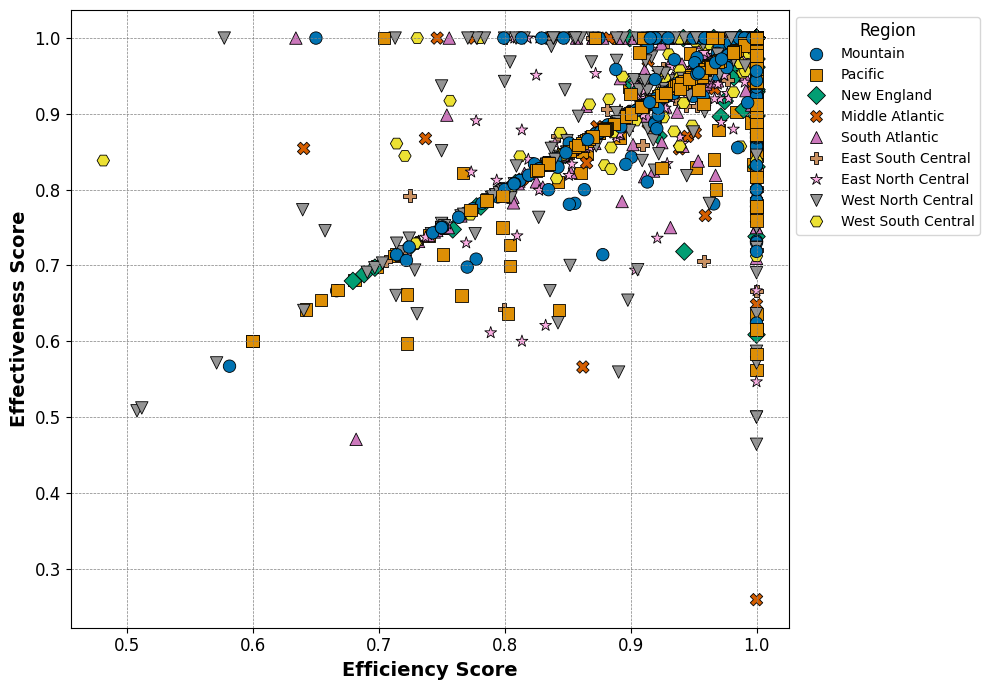

In [50]:
# Define a custom dictionary for markers for each region
markers = {"Mountain": "o", "Pacific": "s", "New England": "D",
           "Middle Atlantic": "X", "South Atlantic": "^",
           "East South Central": "P", "East North Central": "*",
           "West North Central": "v", "West South Central": "H"}

# Improved plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=combined_df,
                x='Efficiency_score',
                y='Effectiveness_score',
                hue='Region',
                style='Region',
                markers=markers,
                palette='colorblind',  # Colorblind-friendly palette
                s=80,                  # Increased marker size
                edgecolor='black',
                linewidth=0.6)

# Title and labels
# plt.title('Efficiency vs. Effectiveness Scores by Region', fontsize=16, fontweight='bold')
plt.xlabel('Efficiency Score', fontsize=14, fontweight='bold')
plt.ylabel('Effectiveness Score', fontsize=14, fontweight='bold')

# Adjust tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Legend
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=12)

# Grid and layout
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Regional Comparison - Efficiency vs Effectiveness
regional_summary = combined_df.groupby('Region').agg({
    'Efficiency_score': 'mean',
    'Effectiveness_score': 'mean'
}).reset_index()

<Figure size 1000x600 with 0 Axes>

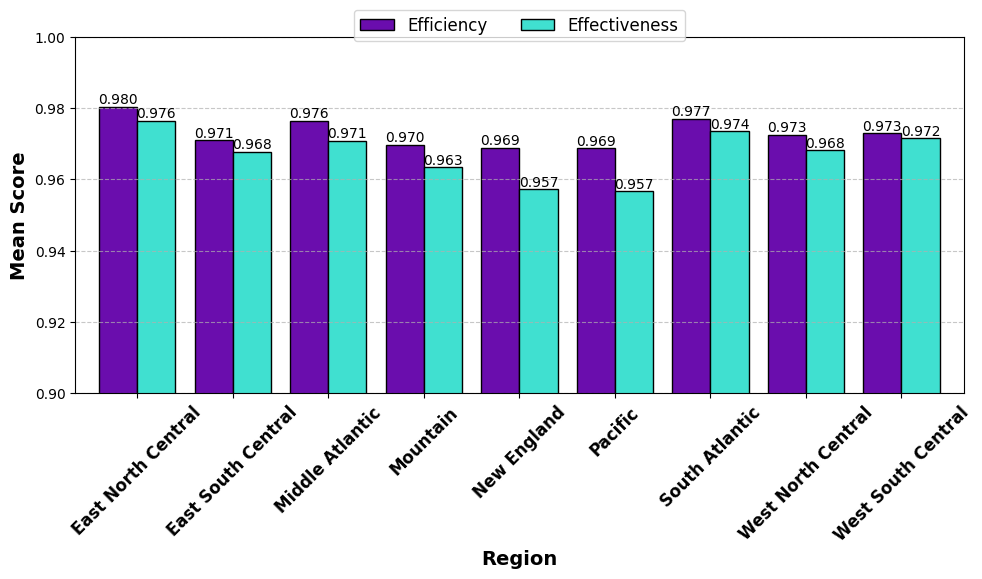

In [ ]:
# Improved Regional Comparison Plot
regional_summary = combined_df.groupby('Region').agg({
    'Efficiency_score': 'mean',
    'Effectiveness_score': 'mean'
}).reset_index()

# Plot for regional comparison with enhanced visuality
plt.figure(figsize=(10, 6))
ax = regional_summary.set_index('Region').plot(
    kind='bar',
    figsize=(10, 6),
    color=['#6a0dad', '#40e0d0'],  # Distinct, accessible colors
    edgecolor='black',  # Add borders to bars
    width=0.8  # Adjust bar width
)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10)

# Set y-axis limits
plt.ylim(0.9, 1.0)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Title and labels
# plt.title("Regional Comparison of Mean Efficiency and Effectiveness Scores", fontsize=16, fontweight='bold')
plt.ylabel("Mean Score", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=14, fontweight='bold')

# Customize x-axis
plt.xticks(fontsize=12, fontweight='bold', rotation=45)

# Move legend to the top
plt.legend(title=None, labels=["Efficiency", "Effectiveness"], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()